# Kiva Crowd-Funding Data Visualization

In [1]:
import plotly.plotly as py

from narcos.kiva_data import KivaData
from narcos.map import plot_map
from narcos.word_cloud import draw_wordcloud
from narcos.country_by_loan import plot_country_by_loan_amount
from narcos.numloanspermonth import numloansmonth

kiva_data = KivaData(use_sample=True)
loan_data = kiva_data.loan_data

SyntaxError: invalid syntax (country_code_converter.py, line 23)

## numloanspermonth

In [ ]:
numloansmonth(loan_data)

## Wordcloud

Wordcloud shows display frequency of keyword. In this dataset, three columns are be ulized: Tags, Activities and Uses.

A very interesting fact found from this viz is that women and men are quiet different. For example, in activities, men are focus on agriculture, farming, and women are in general store, food production etc.

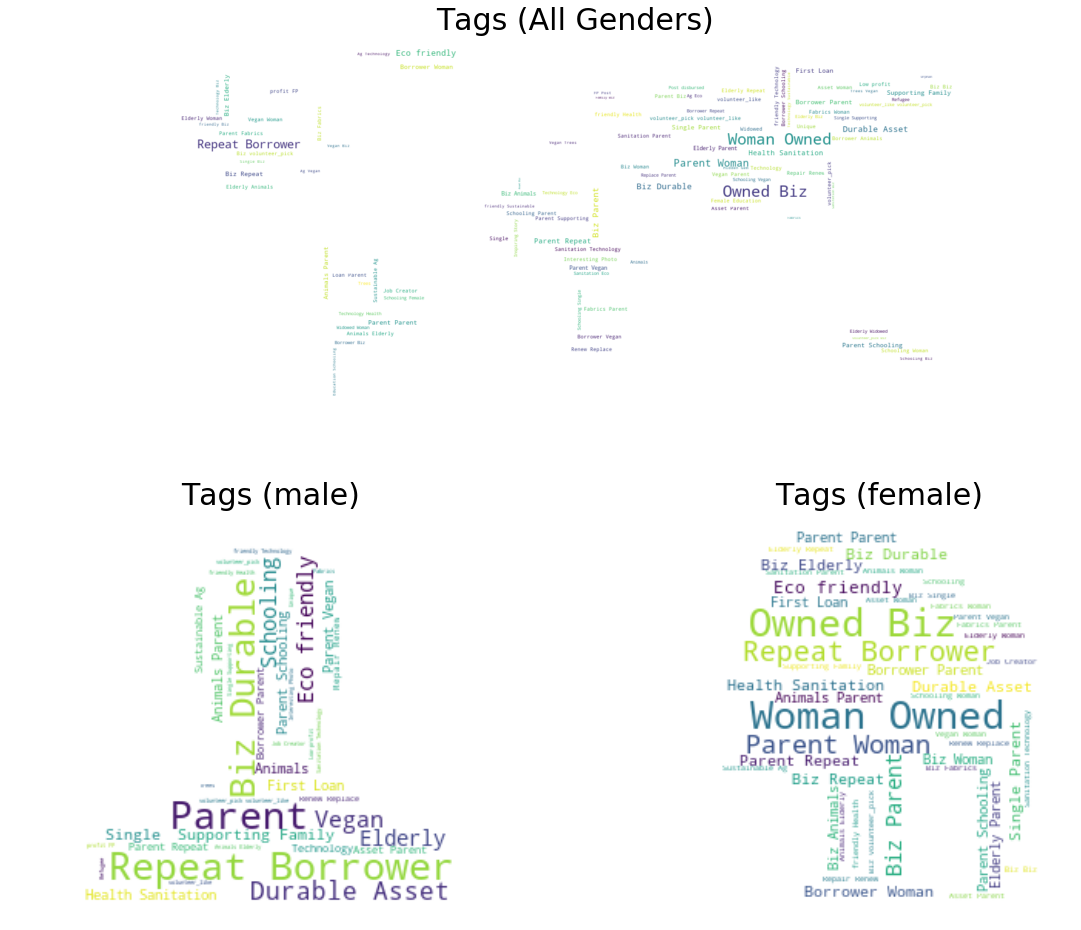

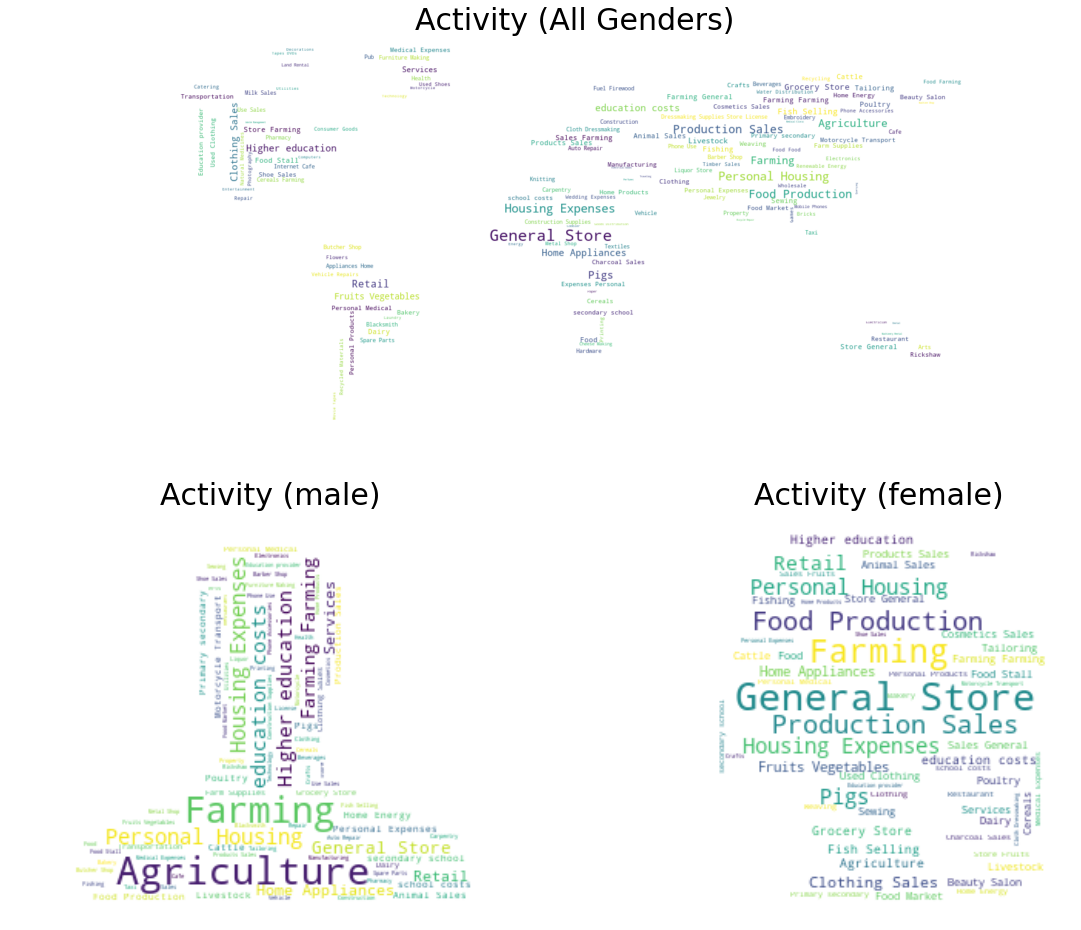

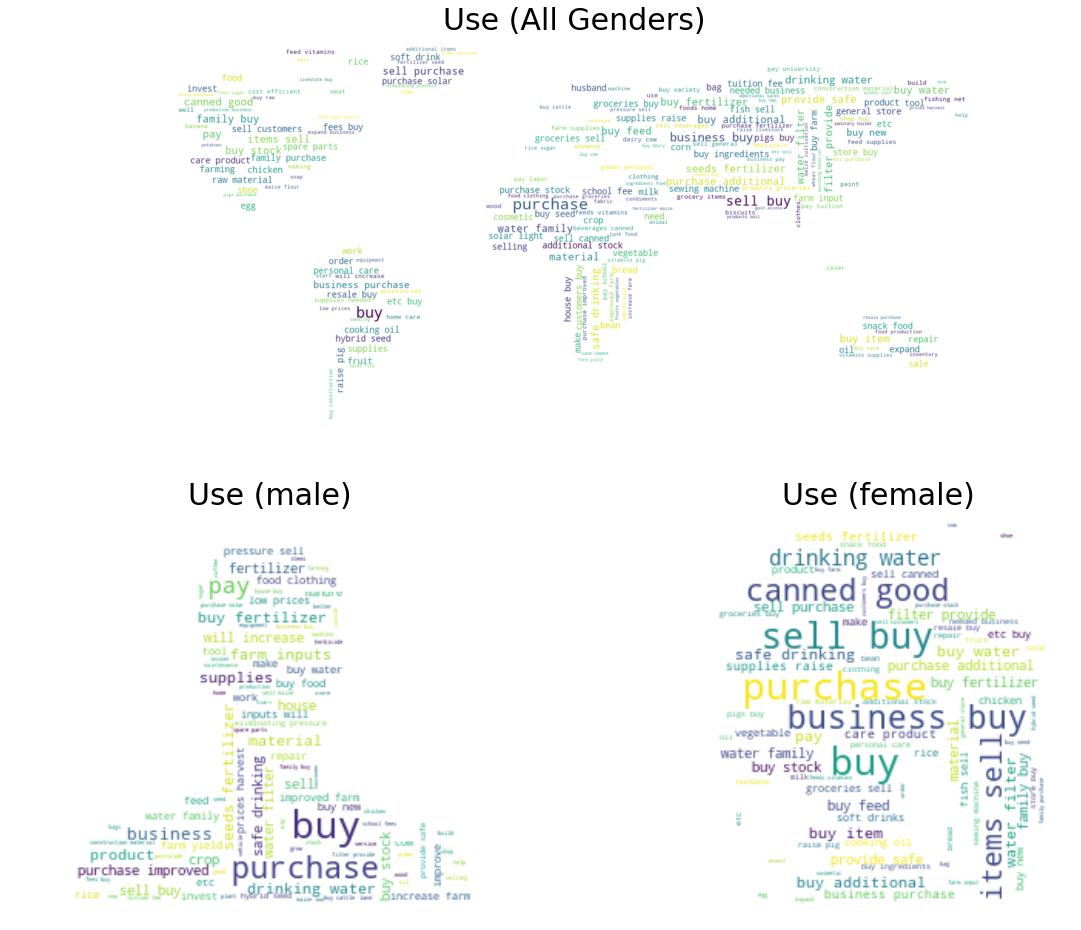

In [3]:
draw_wordcloud(loan_data)

## Map

This visualization provide a very straightfoward on how the loans are distribted geographically. 

From the view, Philipine received most loan in Aisa, Kenya in African and Pragury in American.

In [4]:
py.iplot(plot_map(loan_data), validate=False, filename='d3-world-map' )

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~feng443/0 or inside your plot.ly account where it is named 'd3-world-map'


## Country by Loan

                             country  loan_amount  loan_ranked
0                             Belize       1375.0          2.0
1                              Benin       3925.0          4.0
2                             Brazil       5475.0         11.0
3                           Cameroon       9350.0         17.0
4                              China       4750.0          8.0
5                              Congo       8600.0         15.0
6                              Egypt      22300.0         21.0
7                             Israel      12825.0         18.0
8   Lao People's Democratic Republic      17575.0         20.0
9                            Lesotho       7925.0         14.0
10                           Moldova       5700.0         13.0
11                             Nepal       4150.0          5.0
12                            Panama       4200.0          6.0
13                       Puerto Rico       5525.0         12.0
14                   Solomon Islands       4500.0      

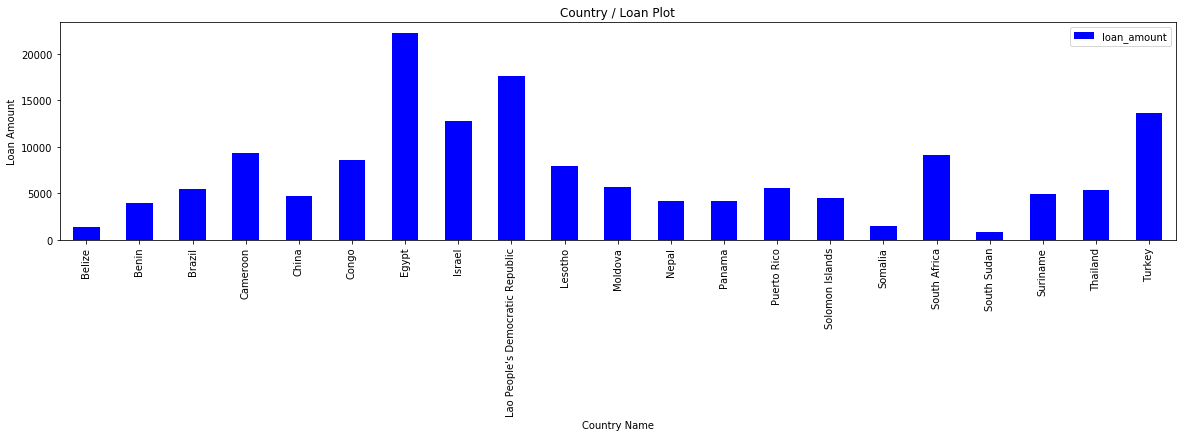

In [5]:
plot_country_by_loan_amount(loan_data)